In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def get_time_data(file_path, column_name = 'elapsed time'):
    from pathlib import Path
    
    df_out = pd.DataFrame(columns=['number', 'tws size', column_name])

    with open(file_path, 'r') as file:
        for line in file.readlines():
            line_list = line.split()
            if line_list != []:
                if line_list[0] == 'tws':
                    line_temp = {'number' : [int(line_list[8])], 'tws size': [line_list[11]],  column_name:[line_list[2]] }
                    df_temp = pd.DataFrame(line_temp)
                    df_out = pd.concat([df_out, df_temp ])
    df_out.set_index("number", inplace=True)

    return df_out

In [4]:
df_opt = get_time_data('./time_results/results_opt.txt',
                     #   "elapsed"
                       "Zig Optimized"
                       )

print(df_opt.shape)
df_opt

(42, 2)


,tws size,Zig Optimized
number,,
0,4,16
1,5,20
2,7,20
3,9,16
4,11,36
5,13,33
6,16,45
7,20,49
8,23,56


In [5]:
df_basic = get_time_data('./time_results/results_det.txt',
                     #   "elapsed"
                       "Zig Basic"
                       )

print(df_basic.shape)
df_opt

(42, 2)


,tws size,Zig Optimized
number,,
0,4,16
1,5,20
2,7,20
3,9,16
4,11,36
5,13,33
6,16,45
7,20,49
8,23,56


C:\Users\Nando\AppData\Local\Temp\ipykernel_996\4206457889.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


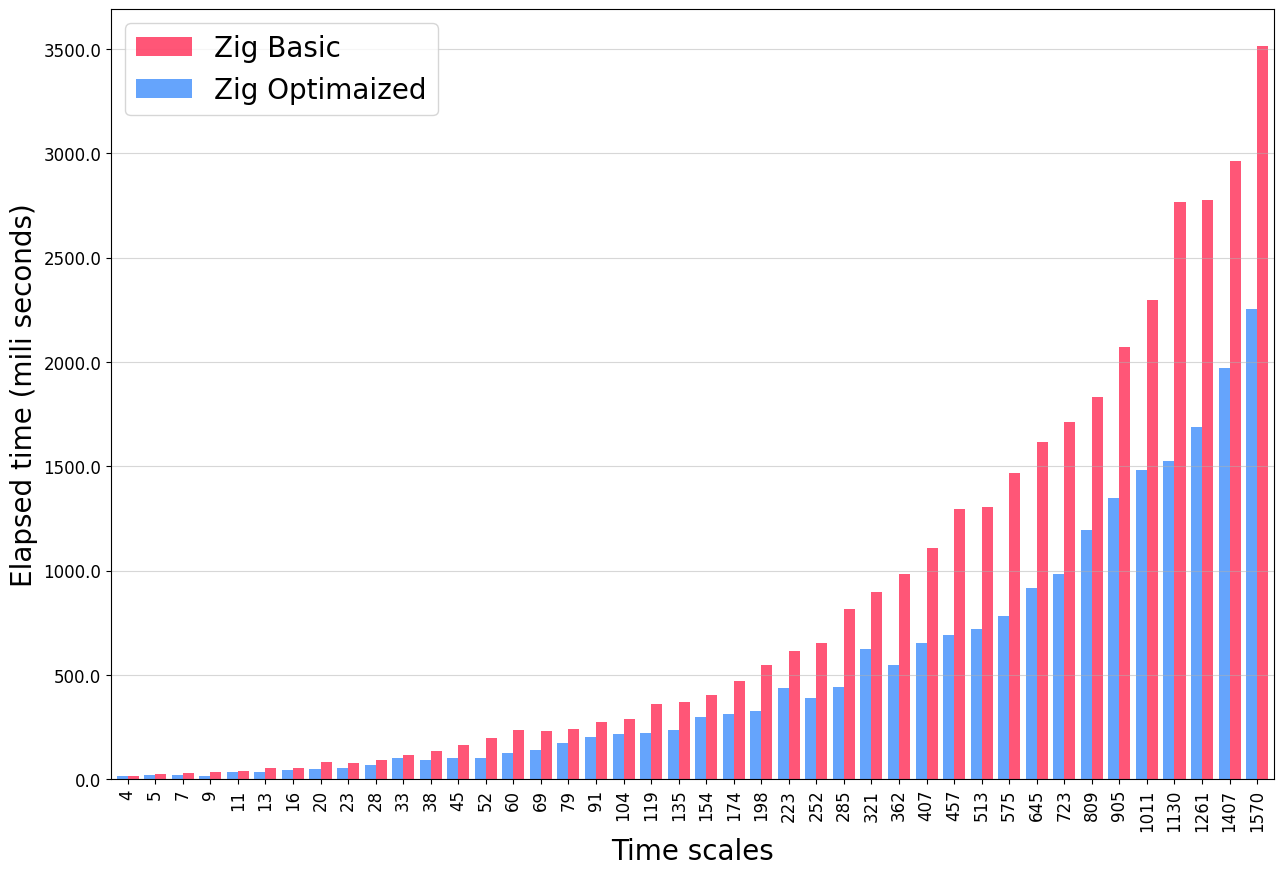

In [18]:
bar_width = .4
opacity = 0.8
bar_offset = 0
x_len = df_basic.shape[0]

x = np.arange(x_len) + bar_offset

fig, ax = plt.subplots(1,1, figsize=(15,10))

ax.bar(
        x + bar_width * .5 , 
        df_basic["Zig Basic"].astype(int), 
        width=bar_width, 
        color='#FF2C55',

        alpha=opacity, 
        # edgecolor='black', 
        label='Zig Basic'
        )


ax.bar(
        x - bar_width * .5, 
        df_opt["Zig Optimized"].astype(int),
        width=bar_width, 
        color='#3F8EFC',    
        alpha=opacity, 
        # edgecolor='black', 
        label='Zig Optimaized')
# ax.semilogx()
ax.legend(fontsize=20)
ax.set_xlim([-bar_width * 1.5 , x_len - bar_width ])

ax.tick_params(axis='x', labelrotation=90)
np.arange(0, 11, step=1)
ax.set_xticks(np.arange(42),df_basic["tws size"], fontsize=12)
ax.set_xlabel("Time scales", fontsize=20)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_ylabel("Elapsed time (mili seconds)", fontsize=20)
# ax.set_title("Elapsed time for Zig Basic and Zig Optimized")
ax.yaxis.grid(True, alpha=0.5)
plt.show()
